# PageRank

This notebook illustrates the ranking of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sknetwork as skn

/usr/lib/python3/dist-packages/pyparsing.py:943: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  collections.MutableMapping.register(ParseResults)


## Undirected graphs

**Loading**

In [6]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Ranking**

In [7]:
pagerank = skn.ranking.PageRank()
pagerank.fit(adjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [8]:
score = pagerank.score_

**Visualization**

In [9]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [10]:
pos = nx.spring_layout(graph)

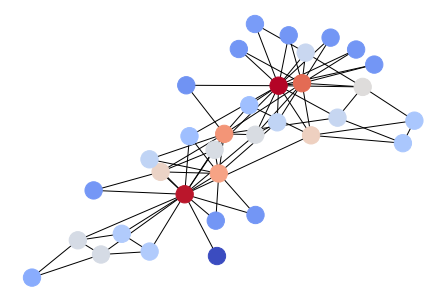

In [12]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(score), cmap='coolwarm')

**Ranking with personalization**

In [13]:
target = [1, 10]

In [14]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[target] = 1

In [15]:
pagerank.fit(adjacency, personalization)

PageRank(damping_factor=0.85, solver='lanczos')

In [16]:
score = pagerank.score_

**Visualization**

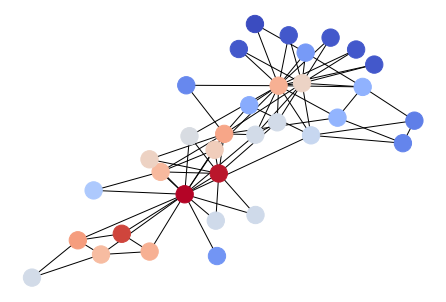

In [17]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(score), cmap='coolwarm')

## Directed graphs

**Loading**

In [18]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Ranking**

In [20]:
pagerank = skn.ranking.PageRank()
pagerank.fit(adjacency)

PageRank(damping_factor=0.85, solver='lanczos')

In [21]:
score = pagerank.score_

**Visualization**

In [22]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

In [23]:
pos = nx.spring_layout(graph)

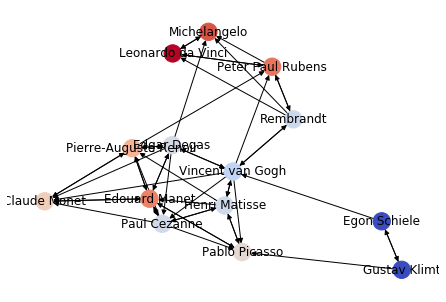

In [24]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(score), cmap='coolwarm', labels=names)

**Ranking with personalization**

In [25]:
cezanne = 11

In [26]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[cezanne] = 1

In [27]:
pagerank.fit(adjacency, personalization)

PageRank(damping_factor=0.85, solver='lanczos')

In [28]:
score = pagerank.score_

**Visualization**

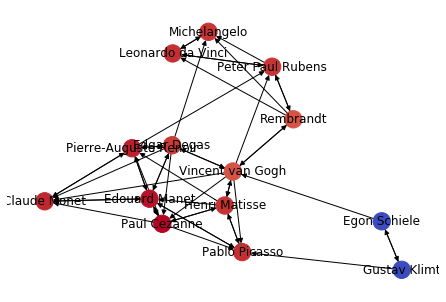

In [29]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(score + 1e-10), cmap='coolwarm', labels=names)